# Training a ConvNet with the ImageDataGenerator from TF

In [1]:
import tensorflow as tf
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nRows = 4
nCols = 4

# Index for iterating over images
pic_index = 0

2023-06-27 17:31:22.766393: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-27 17:31:22.766409: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip --directory-prefix {'./assets/data'}

--2023-06-27 17:31:24--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2a00:1450:4019:807::2010, 2a00:1450:4019:80b::2010, 2a00:1450:4019:80c::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2a00:1450:4019:807::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘./assets/data/horse-or-human.zip.2’

horse-or-human.zip. 100%[===================>] 142.65M  15.8MB/s    in 10s     

2023-06-27 17:31:35 (14.0 MB/s) - ‘./assets/data/horse-or-human.zip.2’ saved [149574867/149574867]



In [3]:
import zipfile

# Unzip the dataset
local_zip = './assets/data/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./assets/data/horse-or-human')

zip_ref.close()

In [4]:
import os

# Directory with our training horse pictures
horseTrainingDirectory = os.path.join('./assets/data/horse-or-human/horses')

# Directory with our training human pictures
humanTrainingDirectory = os.path.join('./assets/data/horse-or-human/humans')

In [5]:
horseTrainingNames = os.listdir(horseTrainingDirectory)
print(horseTrainingNames[:10])

humanTrainingNames = os.listdir(humanTrainingDirectory)
print(humanTrainingNames[:10])

['horse50-3.png', 'horse27-9.png', 'horse35-6.png', 'horse48-5.png', 'horse46-8.png', 'horse14-9.png', 'horse06-0.png', 'horse11-2.png', 'horse15-8.png', 'horse03-8.png']
['human02-29.png', 'human02-09.png', 'human09-07.png', 'human04-03.png', 'human04-02.png', 'human10-18.png', 'human10-24.png', 'human15-04.png', 'human01-13.png', 'human02-27.png']


In [6]:
print('Total training horse images:', len(os.listdir(horseTrainingDirectory)))
print('Total training human images:', len(os.listdir(humanTrainingDirectory)))

Total training horse images: 500
Total training human images: 527


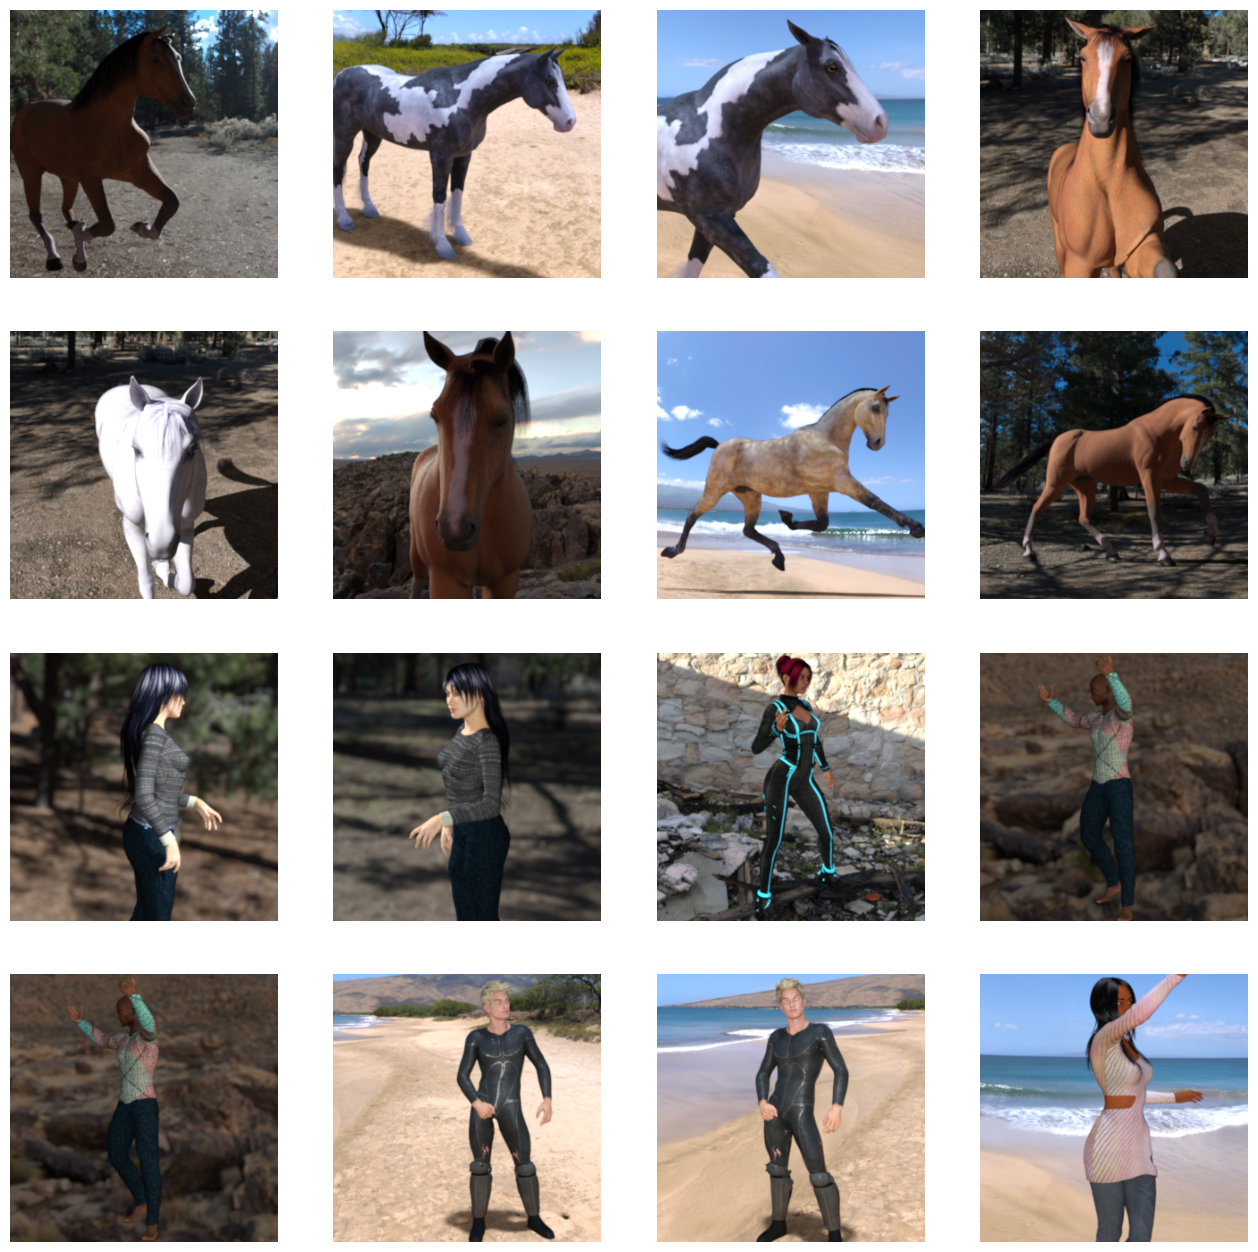

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()

fig.set_size_inches(nCols * 4, nRows * 4)

pic_index += 8

next_horse_pix = [os.path.join(horseTrainingDirectory, fname) for fname in horseTrainingNames[pic_index-8:pic_index]]

next_human_pix = [os.path.join(humanTrainingDirectory, fname) for fname in humanTrainingNames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nRows, nCols, i + 1)
    
    sp.axis('Off') # Don't show axes (or grid lines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [8]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

2023-06-27 17:31:37.231568: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-27 17:31:37.231862: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-27 17:31:37.231948: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-06-27 17:31:37.232002: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-06-27 17:31:37.232076: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='./assets/model/model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

ModuleNotFoundError: No module named 'tf'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
trainingGenerator = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using trainingGenerator generator
train_generator = trainingGenerator.flow_from_directory(
	'.assets/data/horse-or-human/',  # This is the source directory for training images
	target_size=(300, 300),  # All images will be resized to 300x300
	batch_size=128,
	# Since we use binary_crossentropy loss, we need binary labels
	class_mode='binary'
)


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1
)

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)